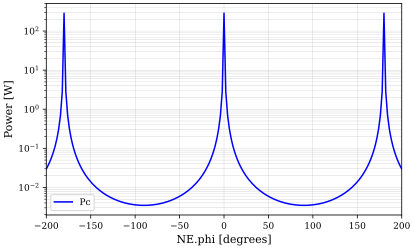

[0.85119284 0.85119284]


/Users/annagreen/GIT/finesse/finesse3/src/finesse/symbols.py:1113: RuntimeWarning: divide by zero encountered in scalar divide
  return self.op(*args)


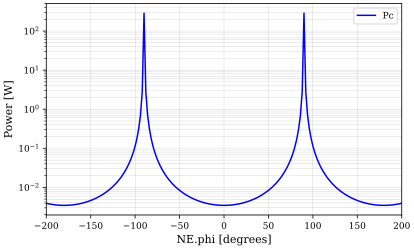

[0.85119284 0.85119284]


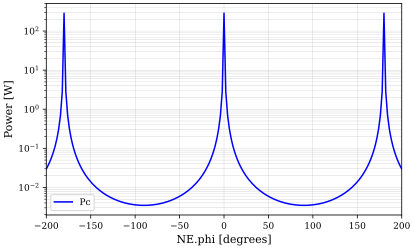

[0.85119284 0.85119284]


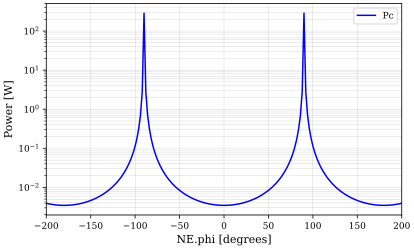

[0.85119284 0.85119284]


In [18]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

import finesse
import finesse.analysis.actions as fac
finesse.init_plotting()

model1=finesse.Model()
model1.parse("""
l i1 1
s sin i1.p1 NI.p1

#simple cavity based on Virgo North Arm
m NI R=0.986203 T=0.01377 L=27u Rc=[-1424.6, -1424.6]
s LN NI.p2 NE.p1 L=2999.818
m NE R=0.9999686 T=4.4u L=27u Rc=[1695.0, 1695.0]
cav cavN NI.p2.o


""")

model2=finesse.Model()
model2.parse("""
l i1 1
s sin i1.p1 NI.p1

#simple cavity based on Virgo North Arm
m NI R=0.986203 T=0.01377 L=27u Rc=[-1424.6, -1424.6]
s LN NI.p2 Minside.p1 L=2999.818
m Minside T=1 L=0 Rc=[1695.0, 1695.0] ## have to specify these curvatures to make cavity stable
s sinside Minside.p2 NE.p1 L=0
m NE R=0.9999686 T=4.4u L=27u Rc=[1695.0, 1695.0]
cav cavN NI.p2.o
""")

model3=finesse.Model()
model3.parse("""
l i1 1
s sin i1.p1 NI.p1

#simple cavity based on Virgo North Arm
m NI R=0.986203 T=0.01377 L=27u Rc=[-1424.6, -1424.6]
s LN NI.p2 Minside.p1 L=2999.818
lens Minside f=inf
s sinside Minside.p2 NE.p1 L=0
m NE R=0.9999686 T=4.4u L=27u Rc=[1695.0, 1695.0]
cav cavN NI.p2.o
""")

model4=finesse.Model()
model4.parse("""
l i1 1
s sin i1.p1 NI.p1

#simple cavity based on Virgo North Arm
m NI R=0.986203 T=0.01377 L=27u Rc=[-1424.6, -1424.6]
s LN NI.p2 Minside.p1 L=2999.818
m Minside T=1 L=0
s sinside Minside.p2 NE.p1 L=0
m NE R=0.9999686 T=4.4u L=27u Rc=[1695.0, 1695.0]
cav cavN NI.p2.o via=NE.p1.i
""")

for model in [model1,model2,model3,model4]:
    model.parse("""
    modes(maxtem=0)
    pd Pc NI.p2.i
    """)
    o=model.run(fac.Xaxis(model.NE.phi, 'lin', -200,200,200))
    o.plot(logy=True)
    print(model.cavN.g)